In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

In [2]:
jobs = pd.read_csv('../output/ScrapedJobOffersAllCleaned.csv', encoding='utf-8')

In [3]:
# Funktion zur Klassifikation der Rolle anhand des Titels
def classify_role(title):
    title_low = str(title).lower()
    if 'scientist' in title_low:
        return 'Scientist'
    elif 'engineer' in title_low:
        return 'Engineer'
    elif 'analyst' in title_low:
        return 'Analyst'
    else:
        return None

In [4]:
# Rolle ableiten und Datensatz filtern
jobs['role'] = jobs['job_title'].apply(classify_role)
jobs_role = jobs.dropna(subset=['role'])

# Median-Gehälter nach Stadt und Rolle
median_salary_city = jobs_role.groupby('city')['annual_salary'] \
    .median() \
    .sort_values(ascending=False)
median_salary_role = jobs_role.groupby('role')['annual_salary'] \
    .median() \
    .sort_values(ascending=False)

print("Median Salary by City:")
print(median_salary_city, '\n')
print("Median Salary by Role:")
print(median_salary_role)

Median Salary by City:
city
München      77000.0
Frankfurt    74000.0
Hamburg      73000.0
Köln         73000.0
Berlin       70000.0
Innsbruck    55300.0
Wien         54000.0
Linz         53802.0
Graz         53500.0
Salzburg     50000.0
Name: annual_salary, dtype: float64 

Median Salary by Role:
role
Scientist    74000.0
Analyst      72000.0
Engineer     69000.0
Name: annual_salary, dtype: float64


/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_13716/351372326.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_city, labels=cities, showfliers=True)


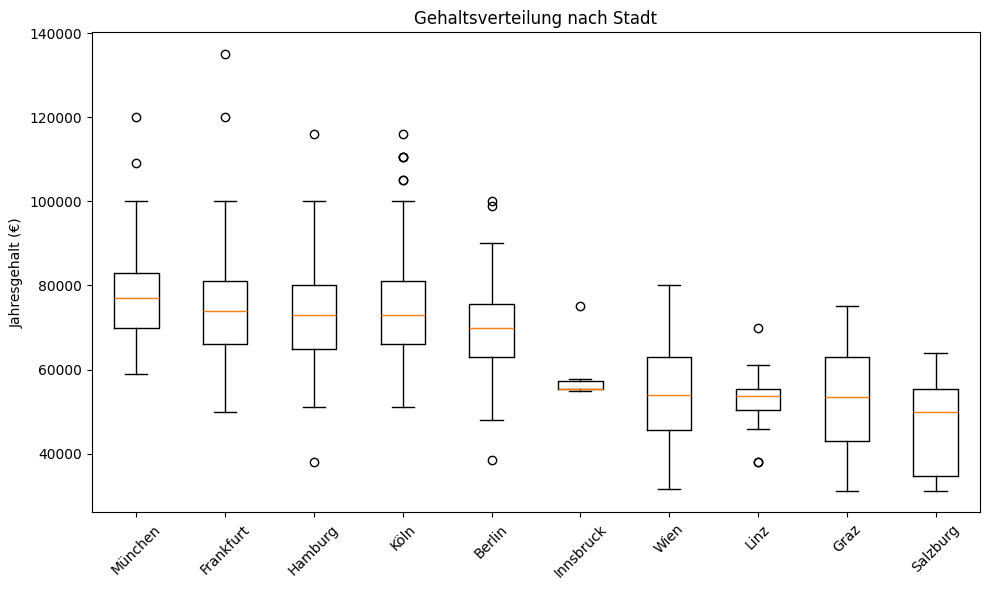

In [5]:
# Boxplot: Gehälter nach Stadt
cities = median_salary_city.index.tolist()
data_city = [jobs_role[jobs_role['city'] == city]['annual_salary'] for city in cities]

plt.figure(figsize=(10, 6))
plt.boxplot(data_city, labels=cities, showfliers=True)
plt.xticks(rotation=45)
plt.title('Gehaltsverteilung nach Stadt')
plt.ylabel('Jahresgehalt (€)')
plt.tight_layout()
plt.show()

/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_13716/1577752070.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_role, labels=roles, showfliers=True)


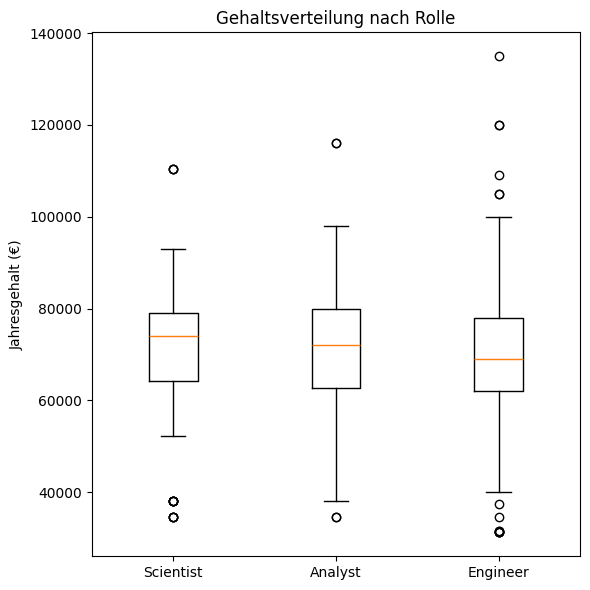

In [6]:
# Boxplot: Gehälter nach Rolle
roles = median_salary_role.index.tolist()
data_role = [jobs_role[jobs_role['role'] == role]['annual_salary'] for role in roles]
plt.figure(figsize=(6, 6))
plt.boxplot(data_role, labels=roles, showfliers=True)
plt.title('Gehaltsverteilung nach Rolle')
plt.ylabel('Jahresgehalt (€)')
plt.tight_layout()
plt.show()

# 2. Analyse


In [7]:
roles = ['Analyst', 'Engineer', 'Scientist']
# CSV-Datei laden
file_path = "../output/ScrapedJobOffersAllCleaned.csv"
df = pd.read_csv(file_path)

In [8]:
file_path = "../output/ScrapedJobOffersAllCleaned.csv"
df = pd.read_csv(file_path)

In [9]:
def extract_data_role(title):
    title = title.lower()
    if "analyst" in title:
        return "Data Analyst"
    elif "engineer" in title:
        return "Data Engineer"
    elif "scientist" in title:
        return "Data Scientist"
    return None

In [10]:
df['data_role'] = df['job_title'].astype(str).apply(extract_data_role)
df_filtered = df[df['data_role'].notnull()]

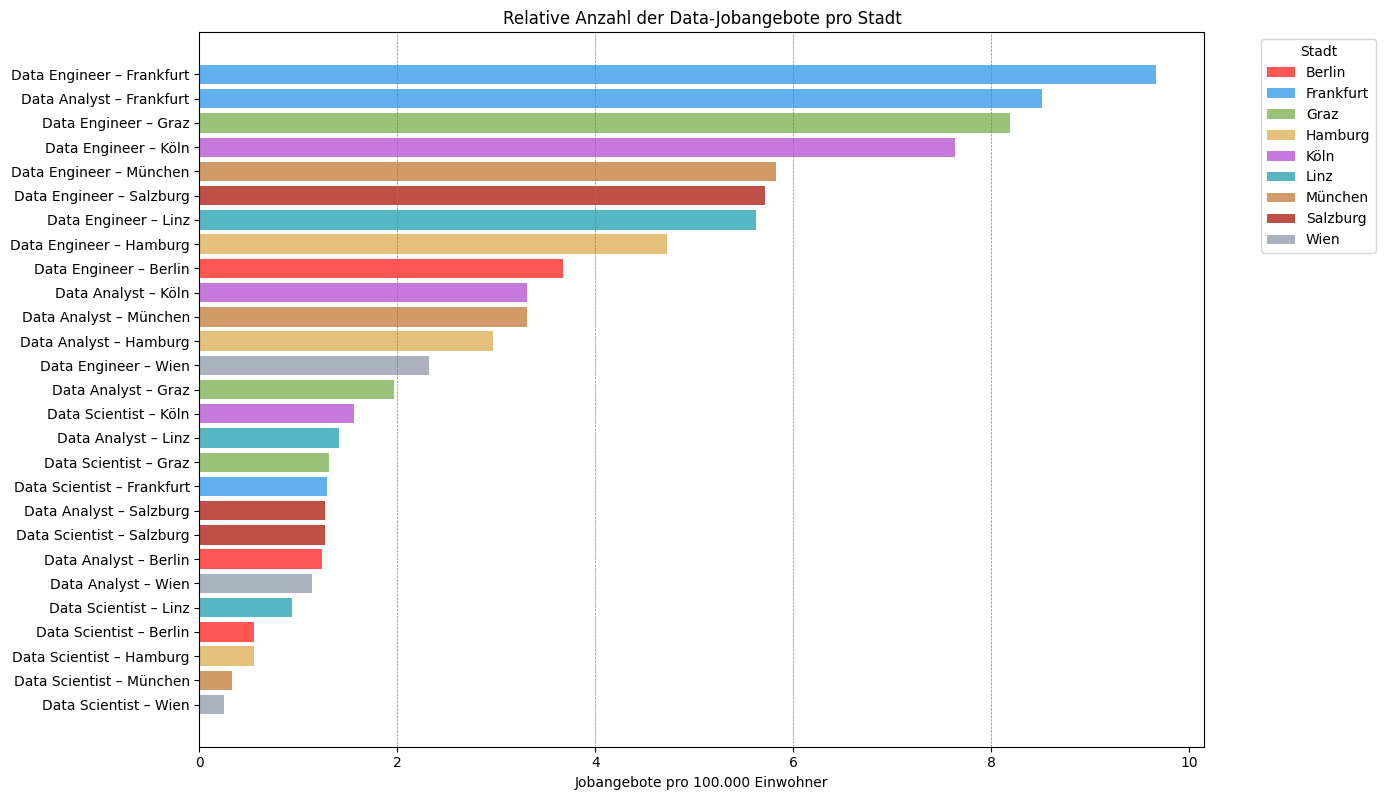

In [11]:
# Alle Kombinationen zählen
job_counts = df_filtered.groupby(['data_role', 'city']).size().reset_index(name='count')
einwohner = {
    "Berlin": 3782202,
    "Hamburg": 1819160,
    "München": 1510378,
    "Frankfurt": 775790,
    "Köln": 1087353,
    "Wien": 2028399,
    "Linz": 213574,
    "Salzburg": 157652,
    "Graz": 305232
}

# Einwohner zuordnen und Gewichtung berechnen
job_counts['einwohner'] = job_counts['city'].map(einwohner)
job_counts = job_counts[job_counts['einwohner'].notnull()]
job_counts['jobs_pro_100k'] = job_counts['count'] / job_counts['einwohner'] * 100000
# 🎨 Farben für jede Stadt (Dark Mode freundlich)
distinct_colors = [
    "#FF5555",  # rot
    "#61AFEF",  # blau
    "#98C379",  # grün
    "#E5C07B",  # orange
    "#C678DD",  # violett
    "#56B6C2",  # türkis
    "#D19A66",  # braun-orange
    "#BE5046",  # rotbraun
    "#ABB2BF",  # hellgrau
    "#FF79C6",  # pink
    "#F1FA8C",  # gelblich
    "#8BE9FD",  # hellblau
]

unique_cities = job_counts['city'].unique()
color_map = {city: distinct_colors[i % len(distinct_colors)] for i, city in enumerate(unique_cities)}
job_counts = job_counts.sort_values(by='jobs_pro_100k', ascending=False)

# 📊 Visualisierung
plt.figure(figsize=(14, max(6, len(job_counts) * 0.3)))

bars = plt.barh(
    job_counts['data_role'] + " – " + job_counts['city'],
    job_counts['jobs_pro_100k'],
    color=[color_map[city] for city in job_counts['city']]
)

plt.xlabel("Jobangebote pro 100.000 Einwohner")
plt.title("Relative Anzahl der Data-Jobangebote pro Stadt")
plt.gca().invert_yaxis()

# 📌 Vertikale Hilfslinien alle 5 Schritte
max_value = job_counts['jobs_pro_100k'].max()
for x in range(2, int(max_value) + 1, 2):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

# 🧭 Legende
legend_elements = [Patch(facecolor=color_map[city], label=city) for city in unique_cities if city in einwohner]
plt.legend(handles=legend_elements, title="Stadt", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()